Importing Required Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [2]:
df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

In [3]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
df.shape

(2000, 21)

In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [9]:
correlation_matrix = df.corr()
correlation_matrix

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

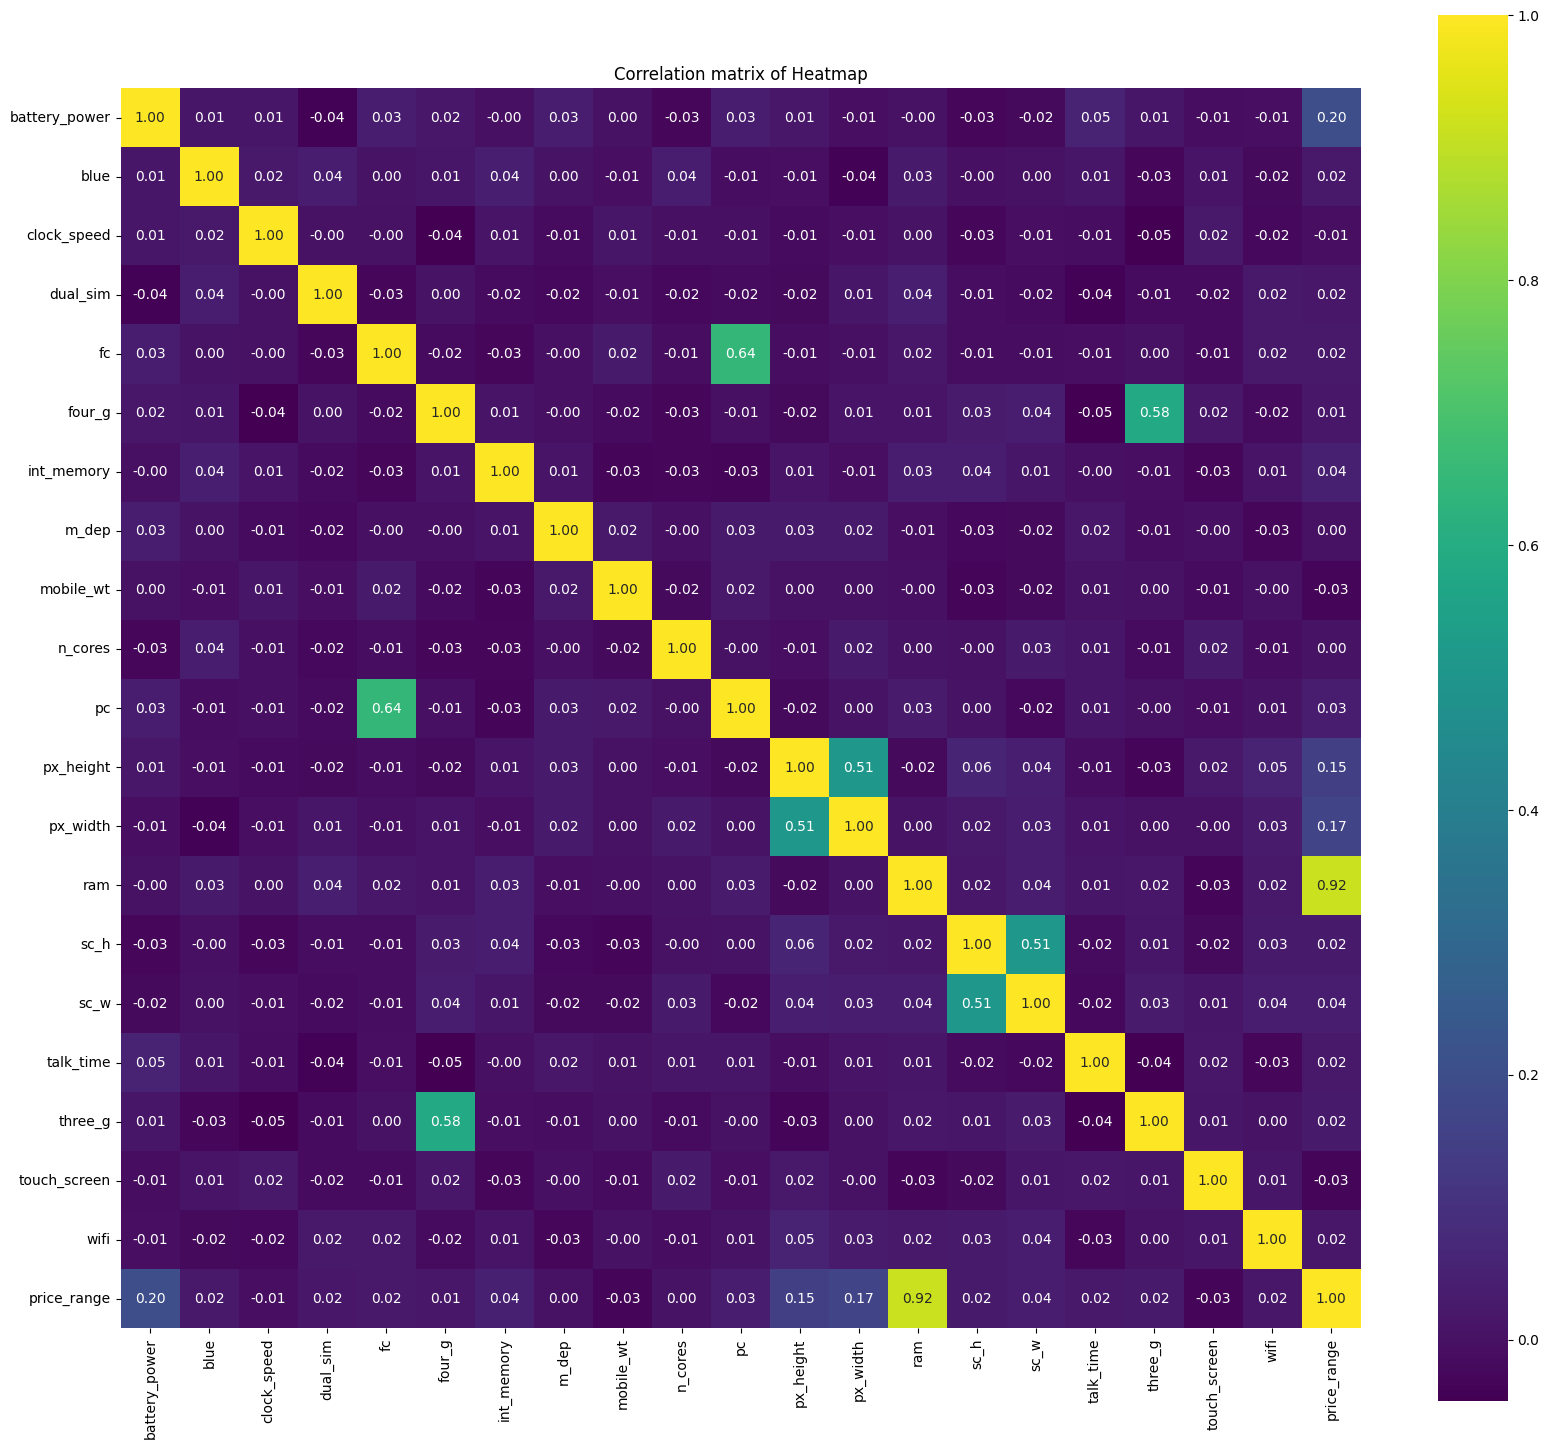

In [10]:
plt.figure(figsize = (20,18))
sns.heatmap(correlation_matrix,annot = True,cmap = 'viridis',fmt = '.2f',square = True)
plt.title('Correlation matrix of Heatmap')
plt.show()

EDA

In [81]:
fig = px.pie(df,names = 'price_range',title ='Price_Range Distribution ',hole =0.4)
fig.show()

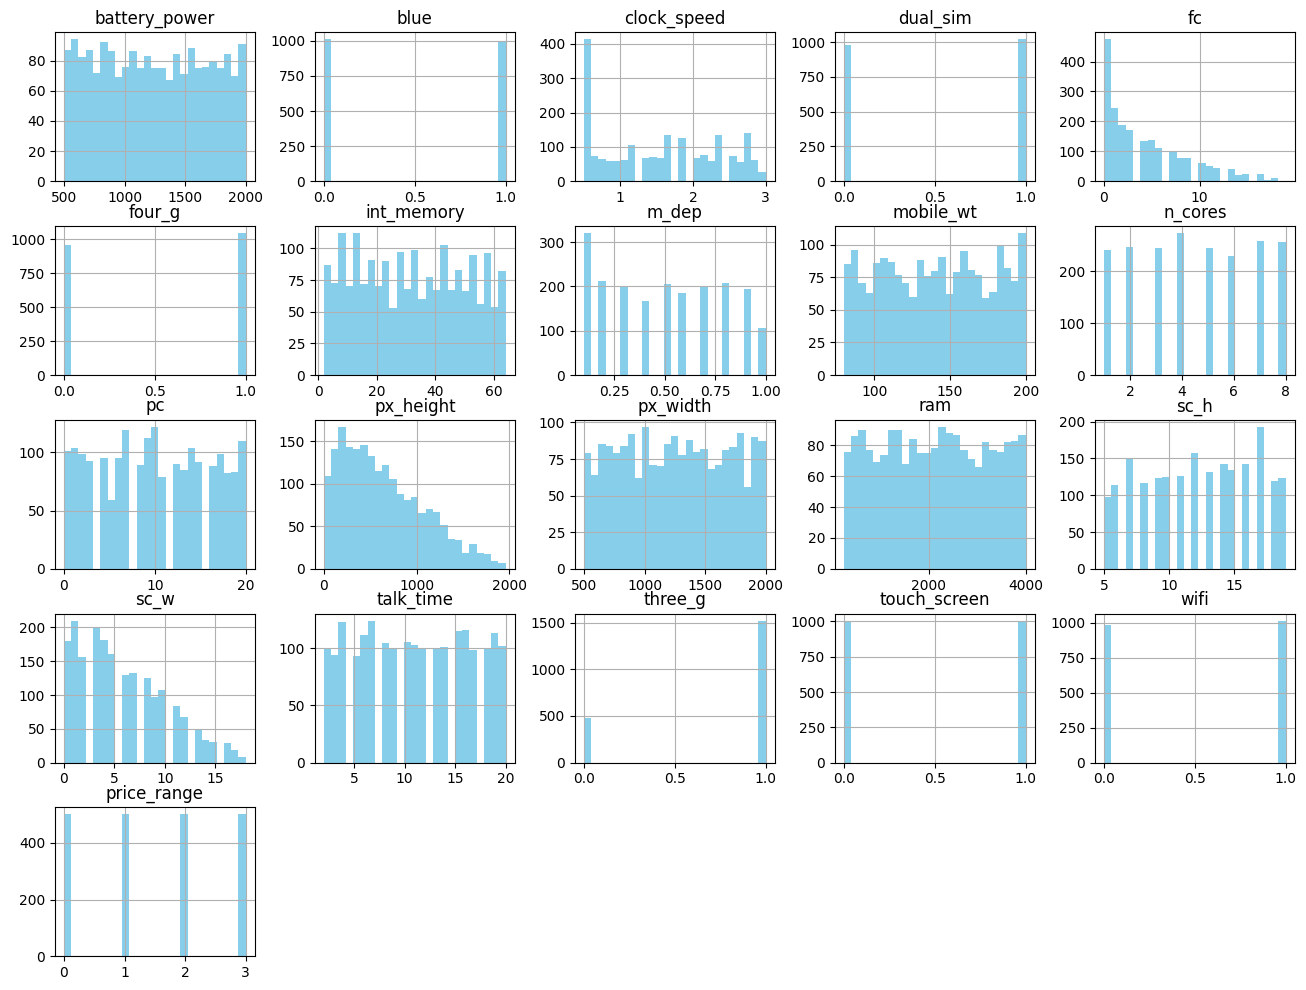

In [12]:
df.hist(color = 'skyblue',bins = 25,figsize = (16,12)) 
plt.title('Distribution of Histogram',fontsize = 15)
plt.show()

In [13]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [14]:
df['battery_power'].unique()

array([ 842, 1021,  563, ..., 1139, 1467,  858])

In [15]:
df['battery_power'].value_counts()

battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: count, Length: 1094, dtype: int64

In [16]:
df['blue'].unique()

array([0, 1])

In [17]:
df['blue'].value_counts()

blue
0    1010
1     990
Name: count, dtype: int64

In [18]:
df['dual_sim'].unique()

array([0, 1])

In [19]:
df['dual_sim'].value_counts()

dual_sim
1    1019
0     981
Name: count, dtype: int64

In [20]:
df['four_g'].unique()

array([0, 1])

In [21]:
df['four_g'].value_counts()

four_g
1    1043
0     957
Name: count, dtype: int64

In [22]:
df['three_g'].unique()

array([0, 1])

In [23]:
df['three_g'].value_counts()

three_g
1    1523
0     477
Name: count, dtype: int64

In [24]:
df['touch_screen'].unique()

array([0, 1])

In [25]:
df['touch_screen'].value_counts()

touch_screen
1    1006
0     994
Name: count, dtype: int64

In [26]:
df['wifi'].unique()

array([1, 0])

In [27]:
df['wifi'].value_counts()

wifi
1    1014
0     986
Name: count, dtype: int64

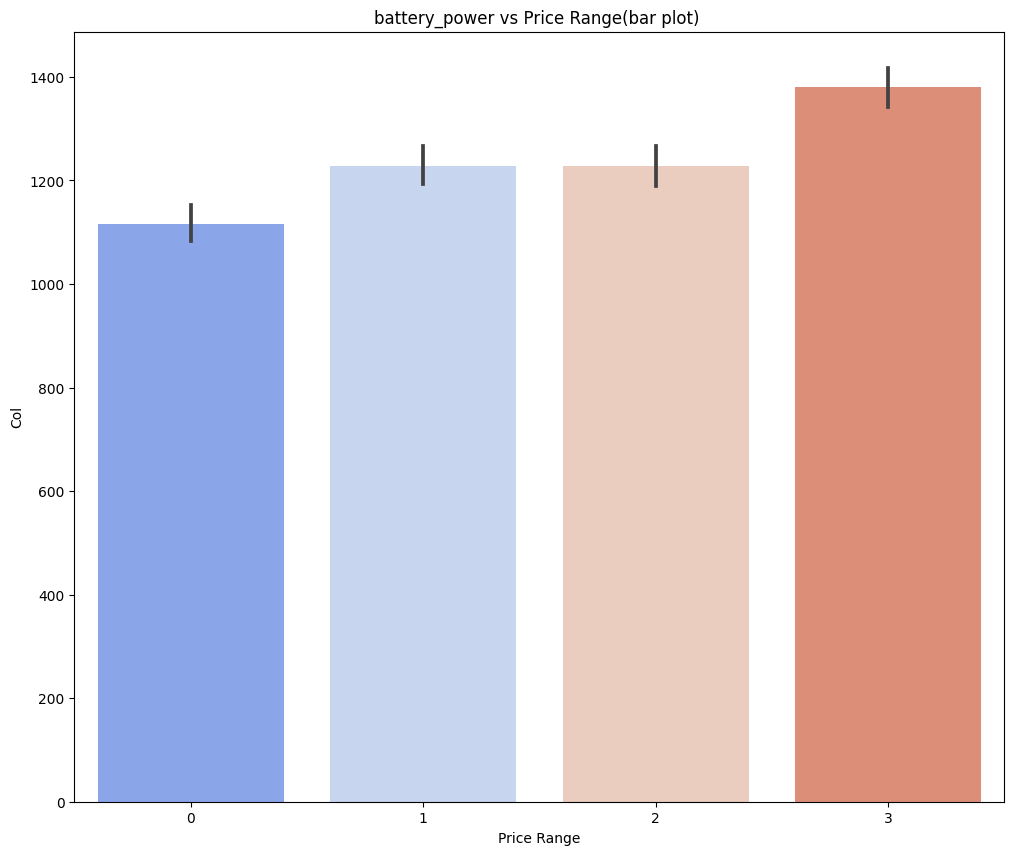

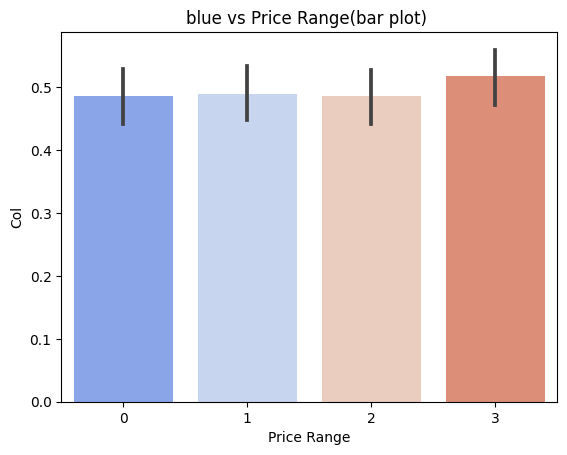

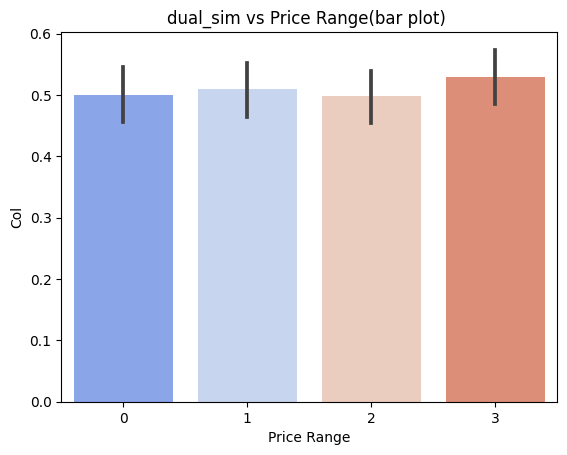

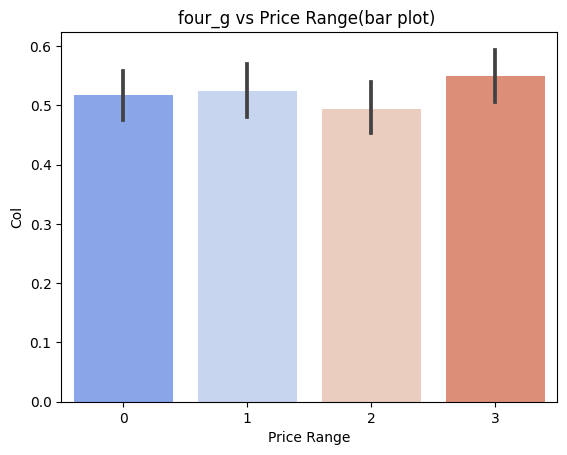

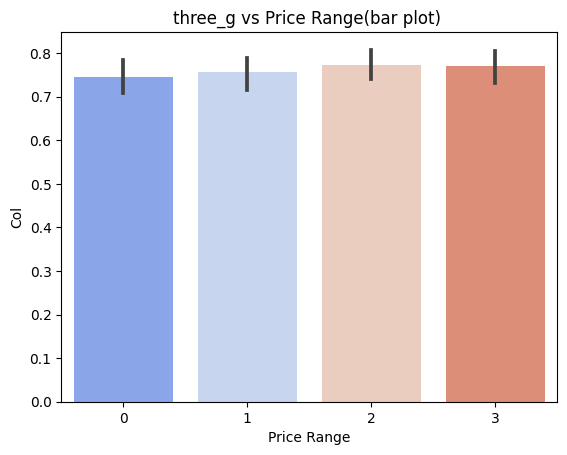

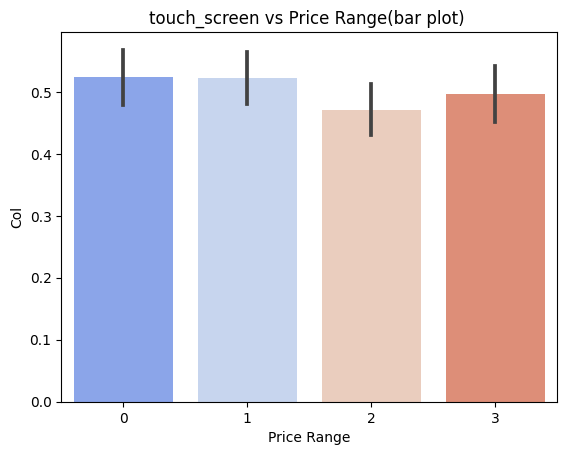

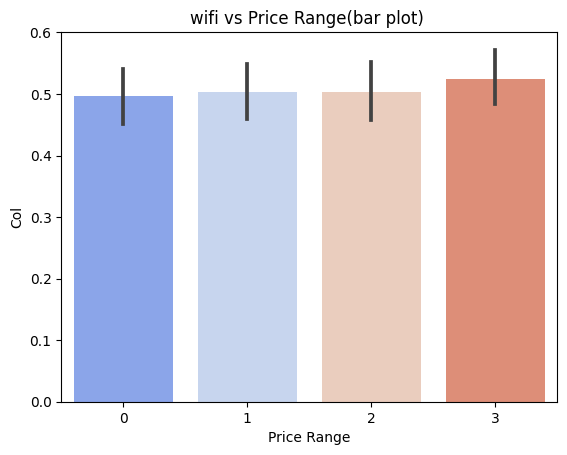

In [28]:
numerical_features = ['battery_power','blue','dual_sim','four_g','three_g','touch_screen','wifi']
plt.figure(figsize = (12,10))
for col in numerical_features:
    sns.barplot(x = 'price_range',y = col,data = df,palette = 'coolwarm')
    plt.xlabel('Price Range')
    plt.ylabel('Col')
    plt.title(f'{col} vs Price Range(bar plot) ')
    plt.show()

<Figure size 1200x1000 with 0 Axes>

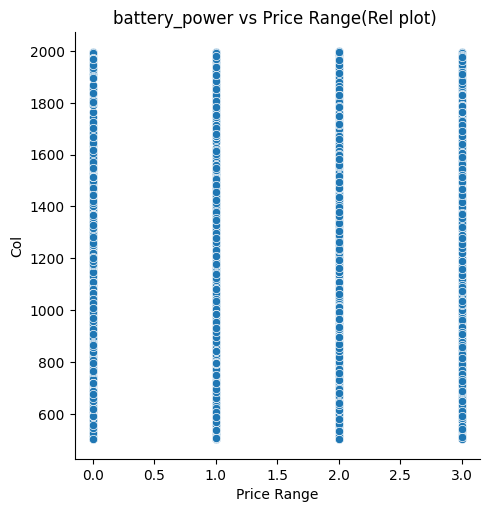

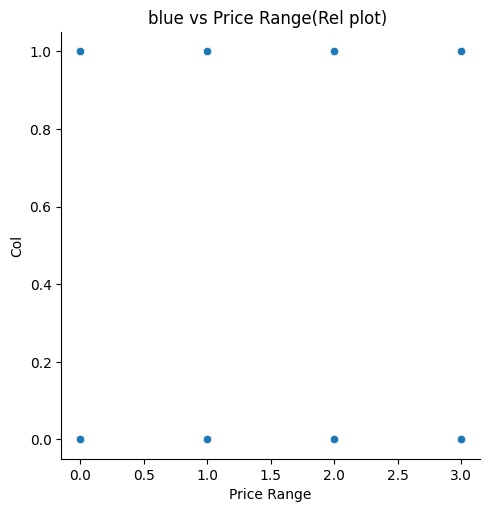

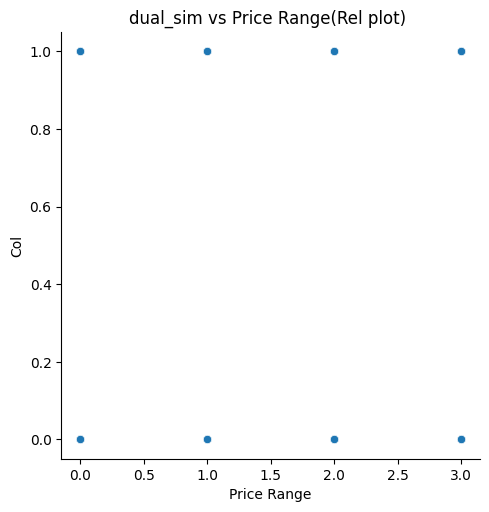

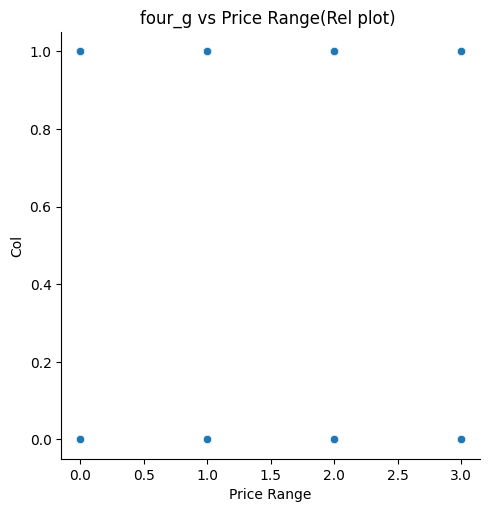

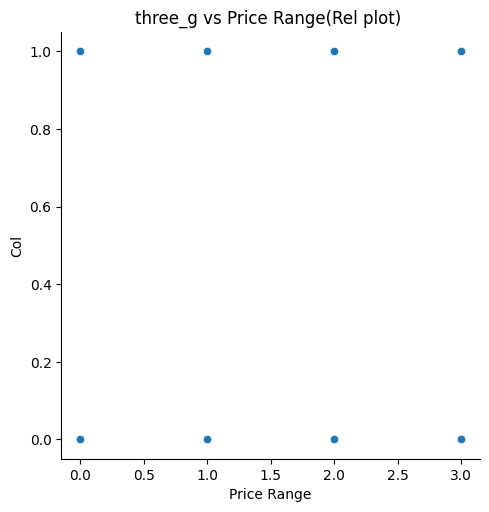

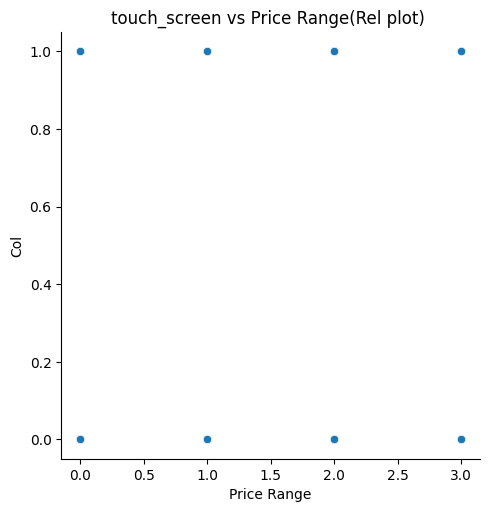

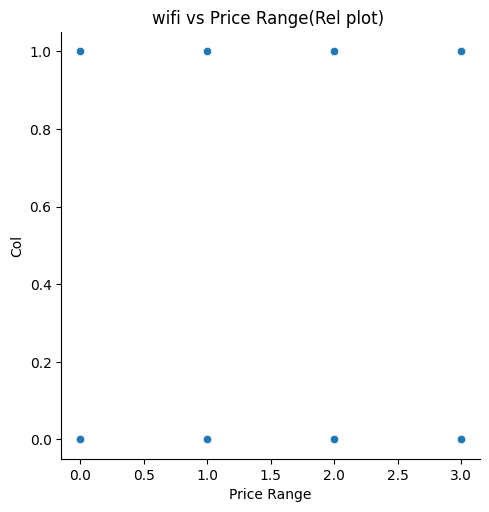

In [29]:
numerical_features = ['battery_power','blue','dual_sim','four_g','three_g','touch_screen','wifi']
plt.figure(figsize = (12,10))
for col in numerical_features:
    sns.relplot(x = 'price_range',y = col,data = df,palette = 'PuBuGn')
    plt.xlabel('Price Range')
    plt.ylabel('Col')
    plt.title(f'{col} vs Price Range(Rel plot) ')
    plt.show()

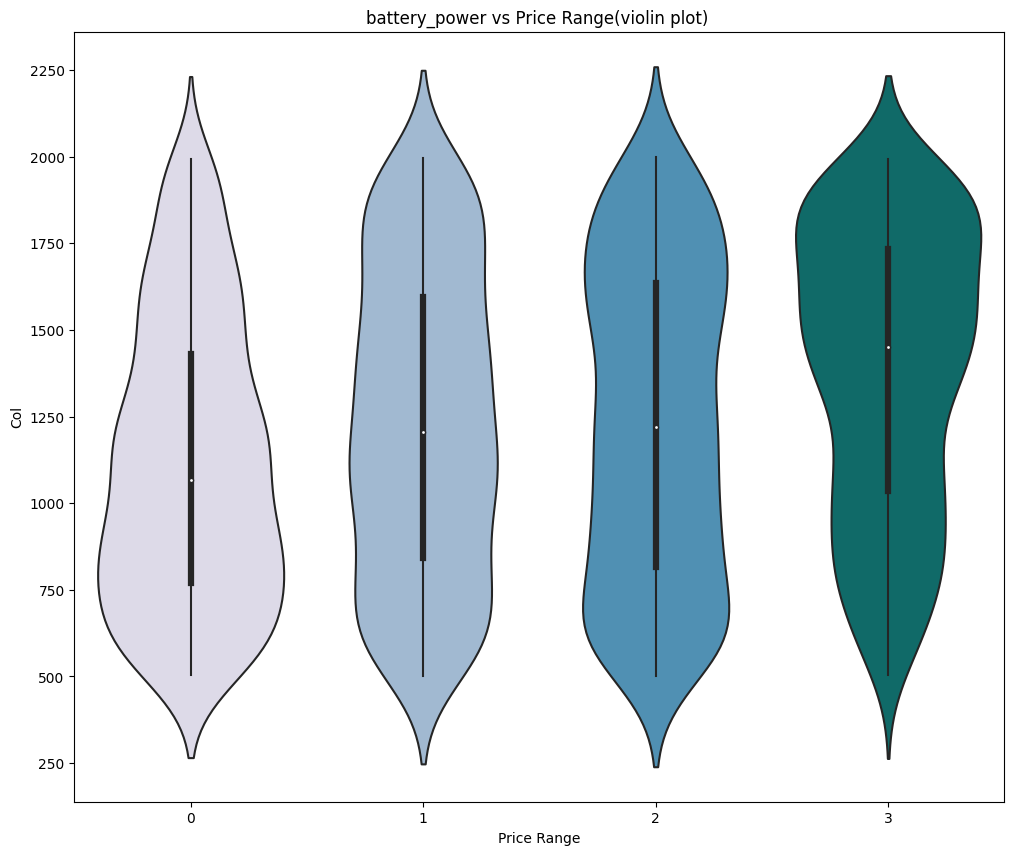

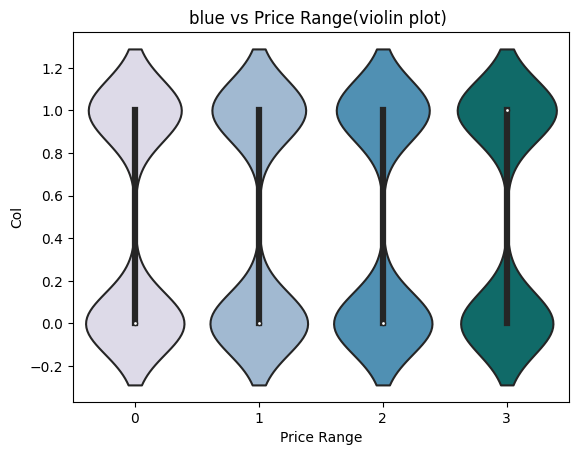

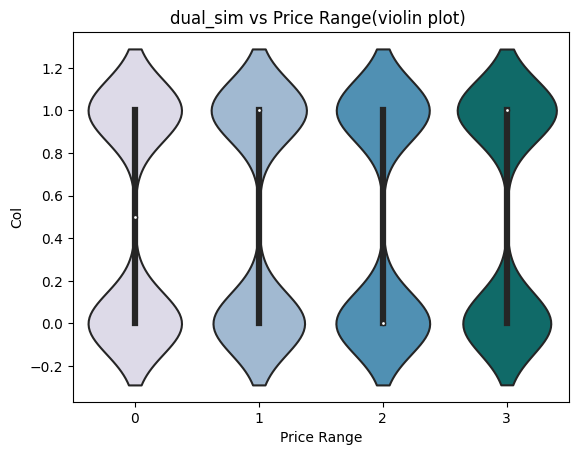

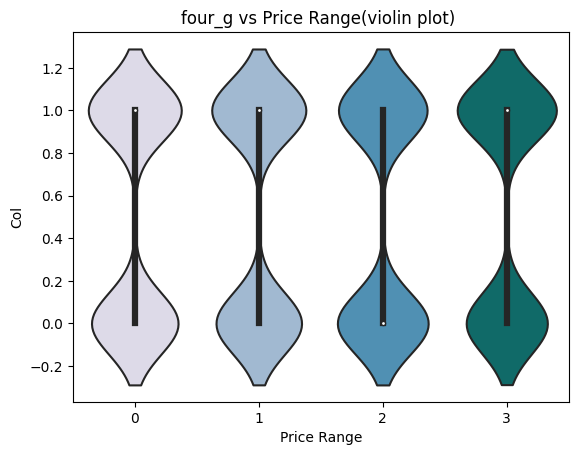

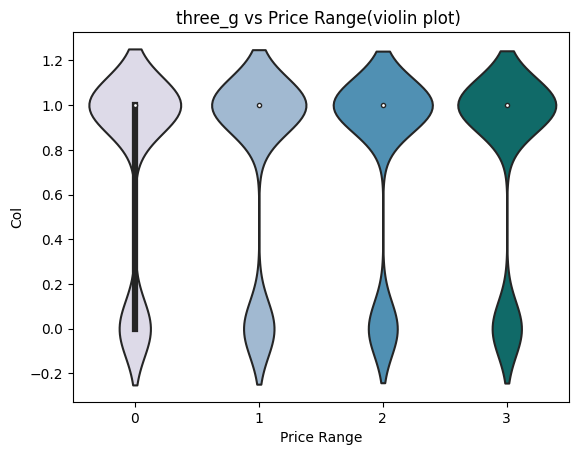

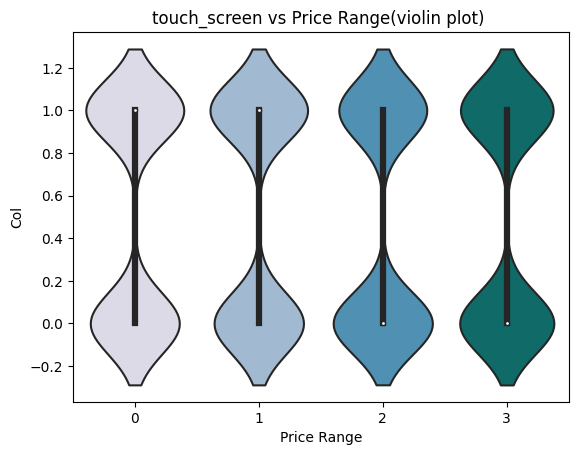

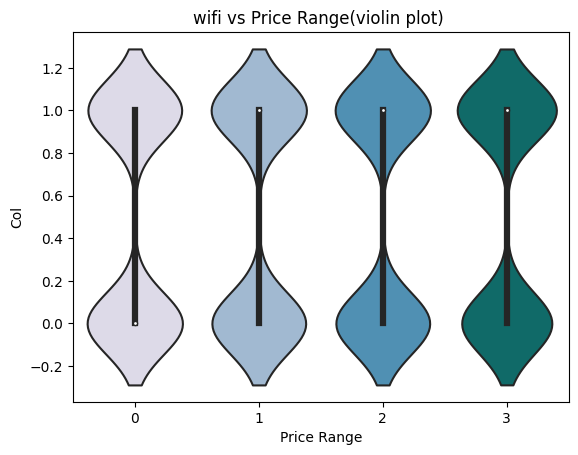

In [30]:
numerical_features = ['battery_power','blue','dual_sim','four_g','three_g','touch_screen','wifi']
plt.figure(figsize = (12,10))
for col in numerical_features:
    sns.violinplot(x = 'price_range',y = col,data = df,palette = 'PuBuGn')
    plt.xlabel('Price Range')
    plt.ylabel('Col')
    plt.title(f'{col} vs Price Range(violin plot) ')
    plt.show()

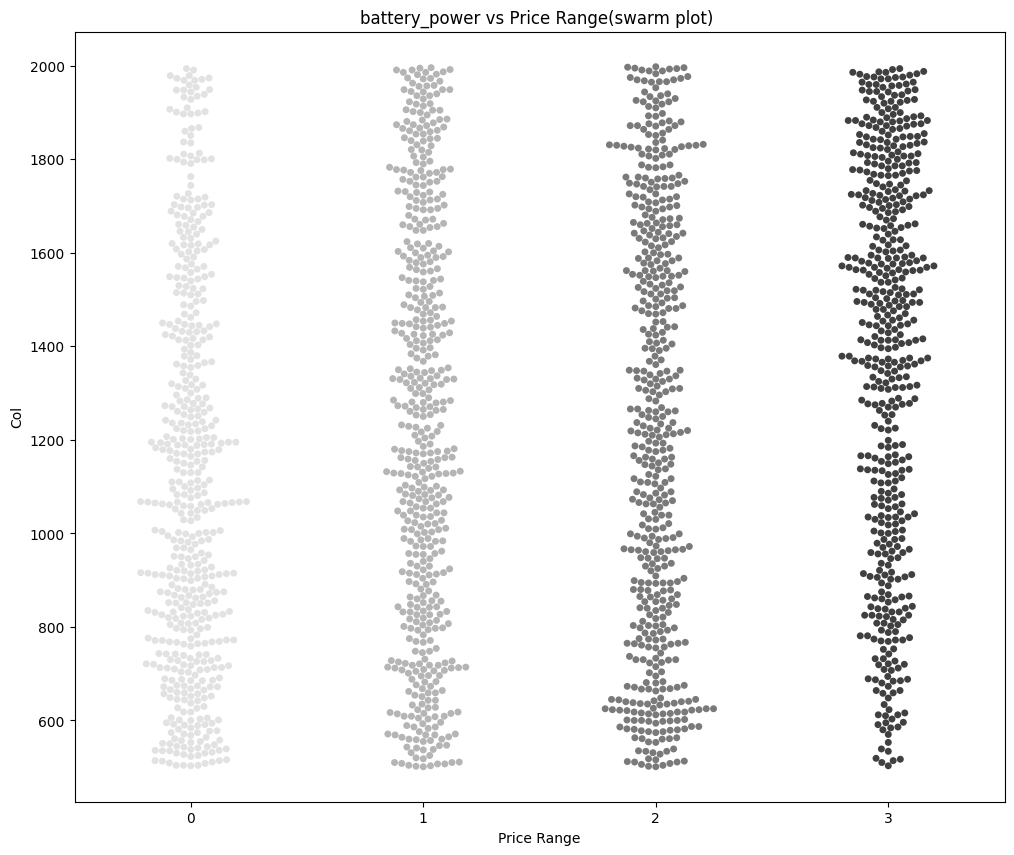

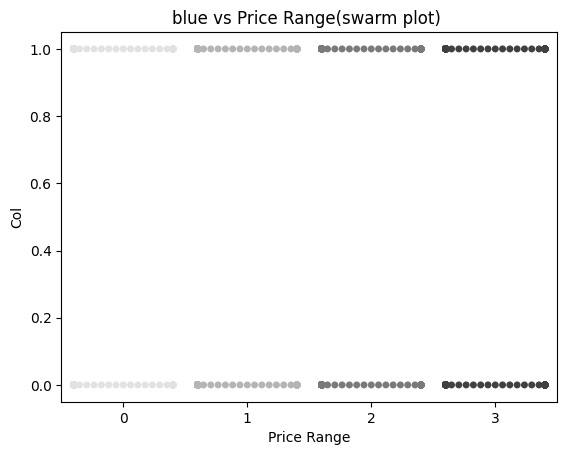

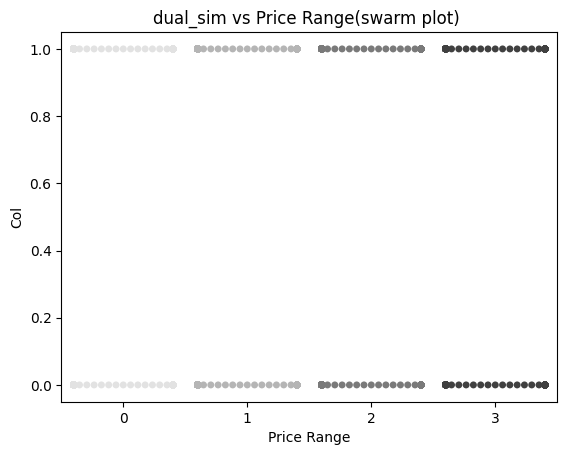

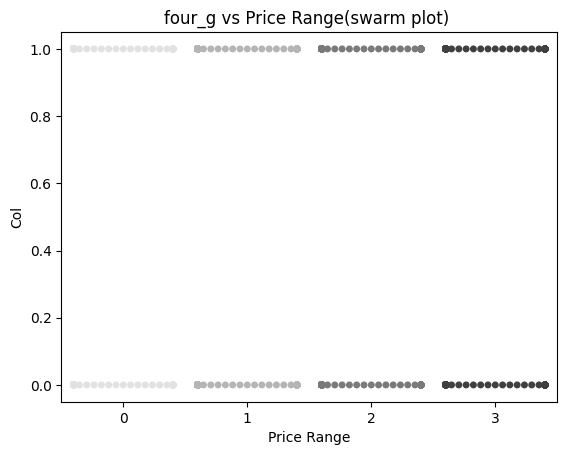

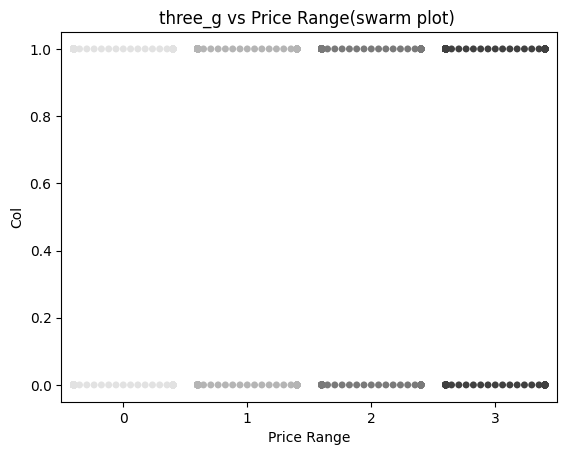

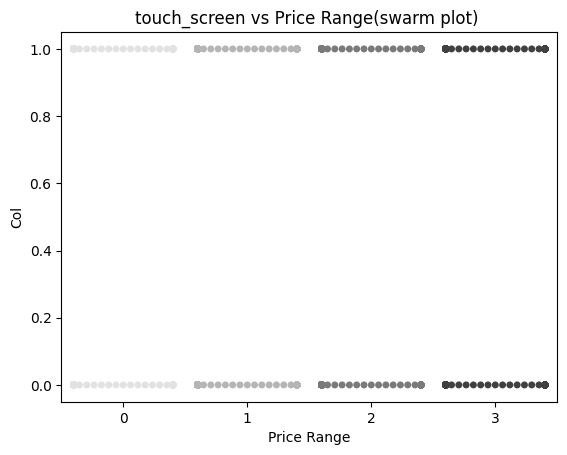

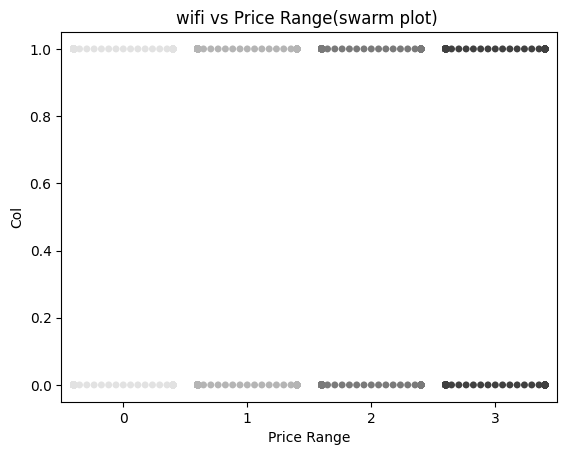

In [31]:
numerical_features = ['battery_power','blue','dual_sim','four_g','three_g','touch_screen','wifi']
plt.figure(figsize = (12,10))
for col in numerical_features:
    sns.swarmplot(x = 'price_range',y = col,data = df,palette = 'Greys')
    plt.xlabel('Price Range')
    plt.ylabel('Col')
    plt.title(f'{col} vs Price Range(swarm plot) ')
    plt.show()

<Figure size 2000x1800 with 0 Axes>

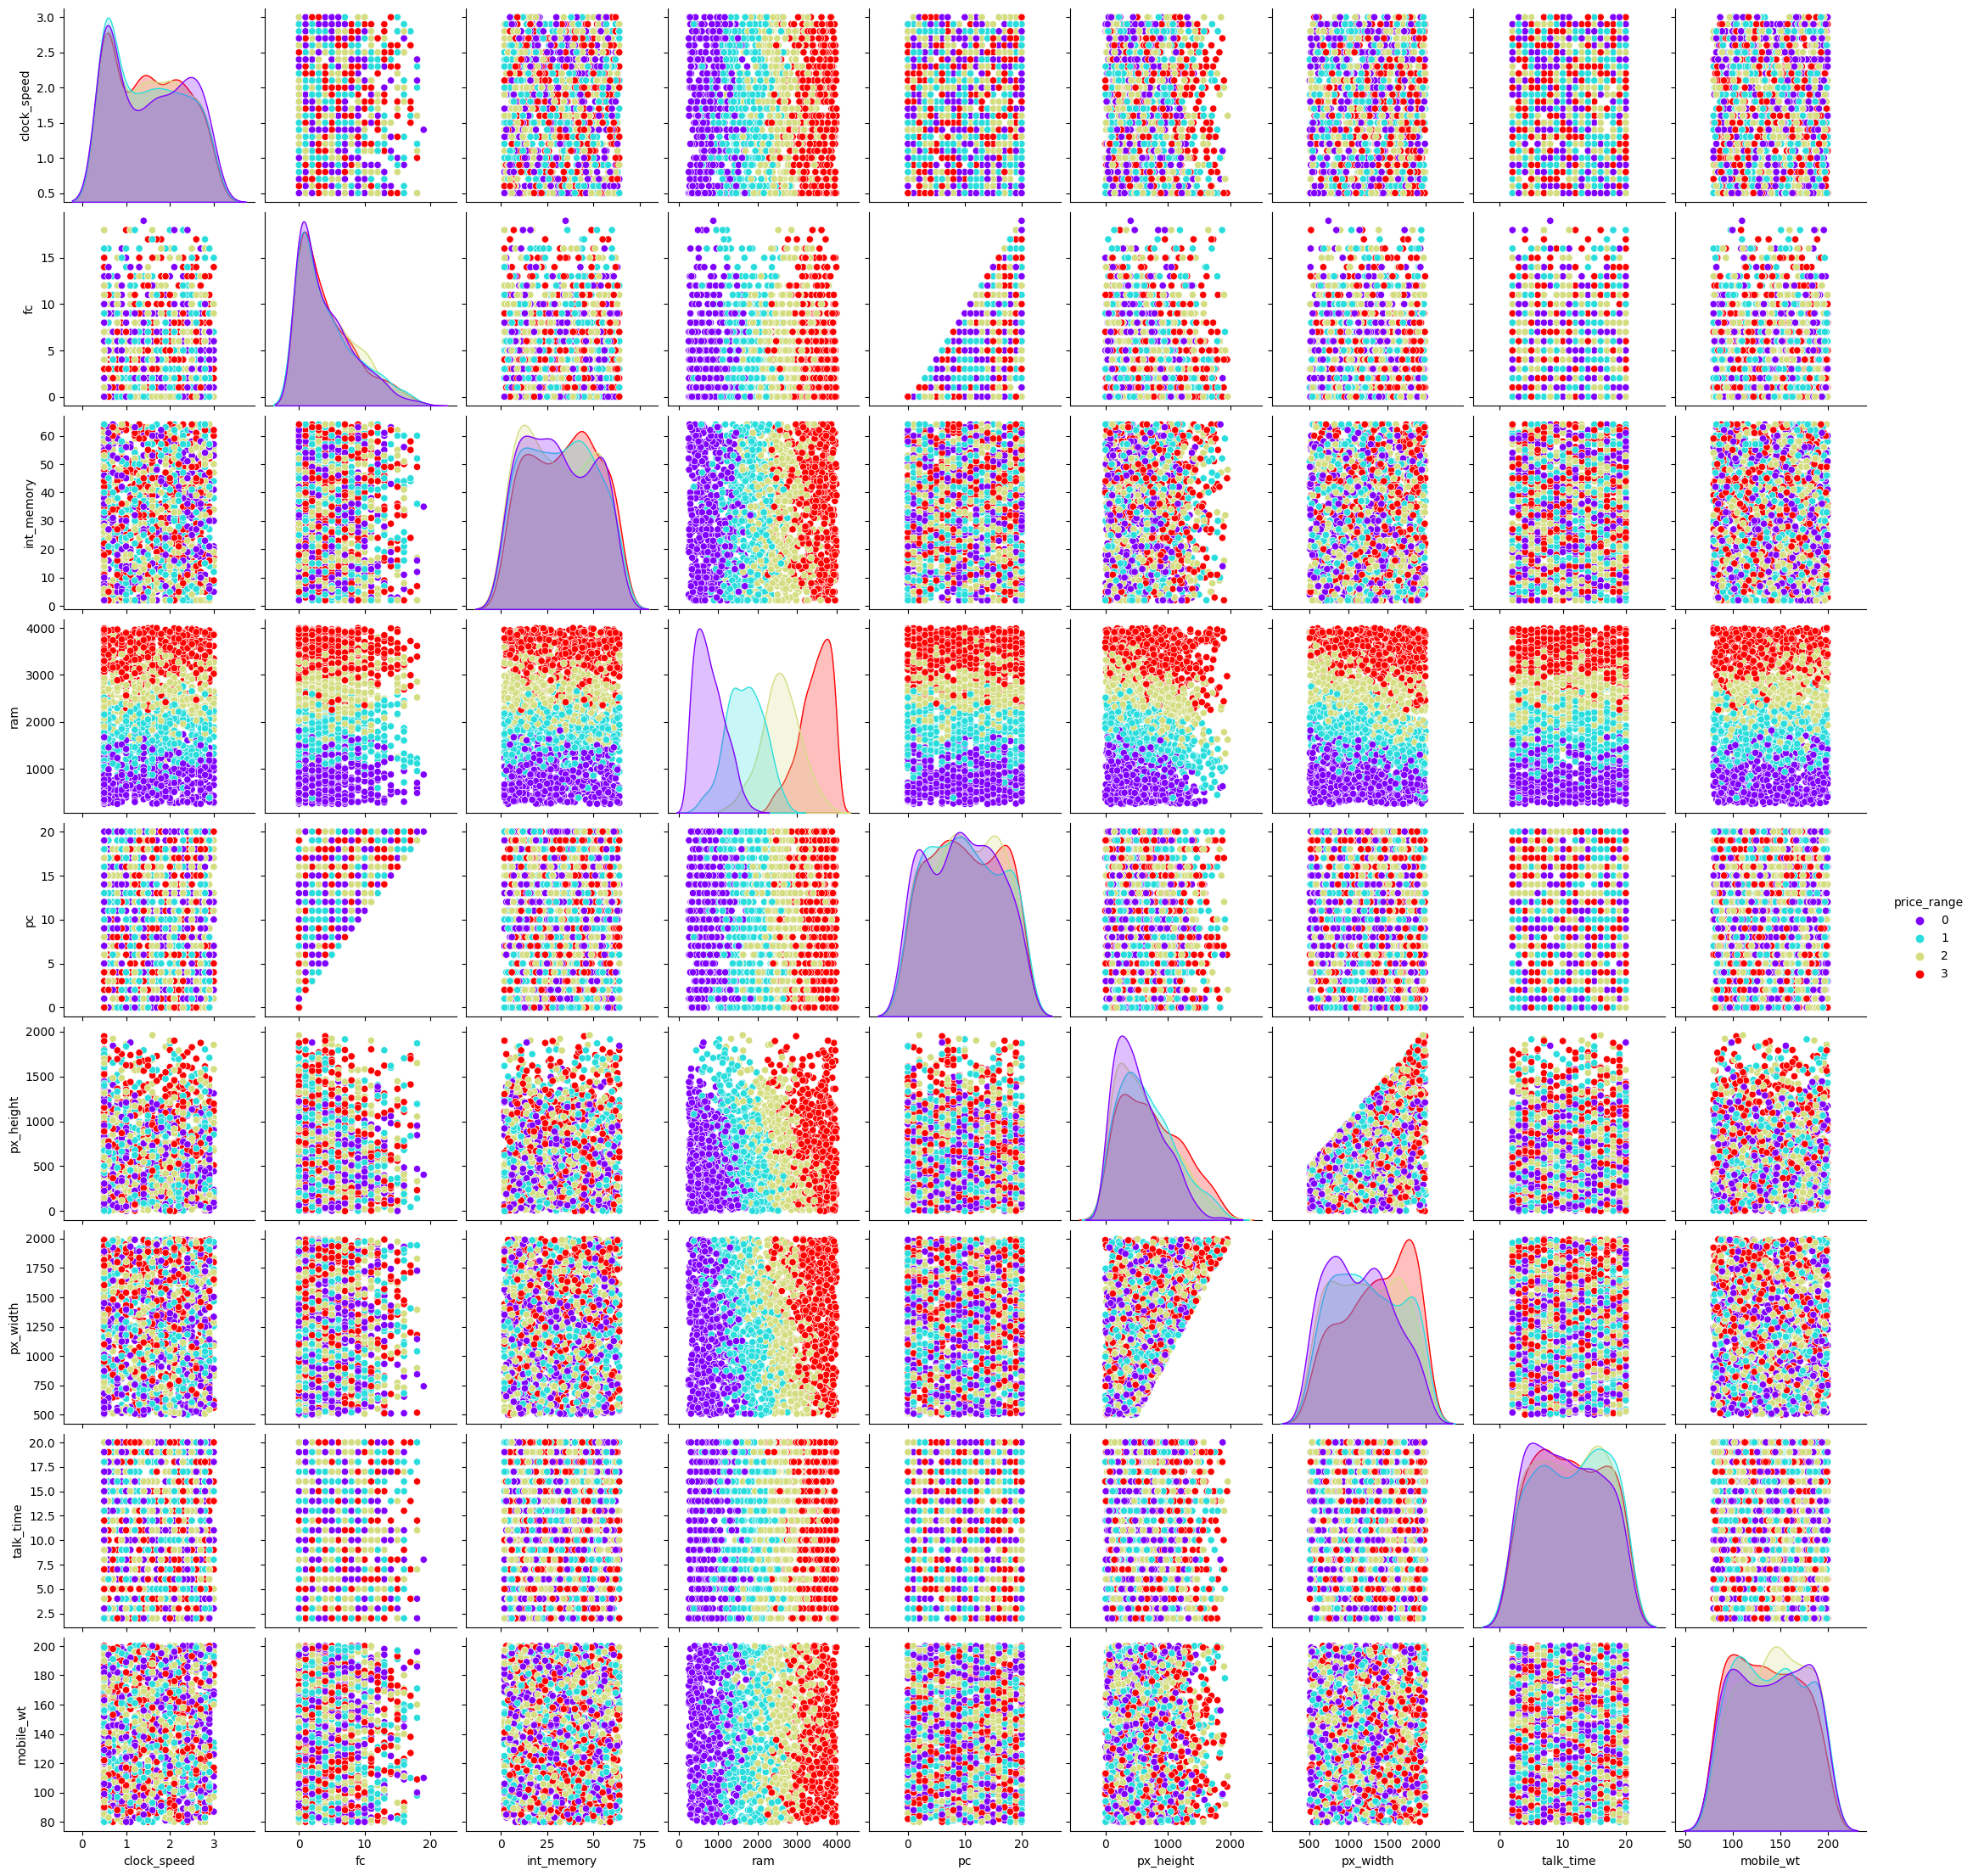

In [32]:
selected_features = ['clock_speed','fc','int_memory','ram','pc','px_height','px_width','talk_time','mobile_wt','price_range']
plt.figure(figsize = (20,18))
sns.pairplot(df[selected_features],hue ='price_range',palette ='rainbow',kind = 'scatter')
plt.show()

PreProcessing

In [33]:
s_scaler = StandardScaler()
df_scaled = pd.DataFrame(s_scaler.fit_transform(df),columns = df.columns)
print(df_scaled)

      battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0         -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1         -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2         -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3         -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4          1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   
...             ...       ...          ...       ...       ...       ...   
1995      -1.011860  1.010051    -1.253064  0.981177 -0.992890  0.957886   
1996       1.653694  1.010051     1.321096  0.981177 -0.992890 -1.043966   
1997       1.530773 -0.990050    -0.762748  0.981177 -0.762495  0.957886   
1998       0.622527 -0.990050    -0.762748 -1.019184 -0.071307  0.957886   
1999      -1.658331  1.010051     0.585621  0.981177  0.159088  0.957886   

      int_memory     m_dep  mobile_wt   n_cores  ...  px_height  px_width  \
0      -1.

In [34]:
x = df.drop('price_range',axis = 1)#feature
y = df['price_range']#target


In [35]:
y.shape

(2000,)

In [36]:
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

split into the 70% training and 30% testing data

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3,random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 20)
(600, 20)
(1400,)
(600,)


Random forest classifier

In [38]:
rclf =  RandomForestClassifier()

In [39]:
rclf.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
y_pred_rclf = rclf.predict(x_test)

Evaluation metrics of Random Forest Classifier

In [41]:
accuracy = accuracy_score(y_test,y_pred_rclf)
precision = precision_score(y_test,y_pred_rclf,average = 'weighted')
recall = recall_score(y_test,y_pred_rclf,average = 'weighted')
f1 = f1_score(y_test,y_pred_rclf,average = 'weighted')


In [42]:
print(f'Accuracy Score:{accuracy:.2f}')
print(f'Precision Score:{precision:.2f}')
print(f'Recall Score:{recall:.2f}')
print(f'F1 Score:{f1:.2f}')


Accuracy Score:0.87
Precision Score:0.87
Recall Score:0.87
F1 Score:0.87


In [43]:
print(classification_report(y_test,y_pred_rclf))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       151
           1       0.81      0.86      0.84       146
           2       0.81      0.78      0.79       148
           3       0.91      0.90      0.90       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



Confusion matrix of Random Forest Classifier

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [45]:
cm = confusion_matrix(y_test,y_pred_rclf)

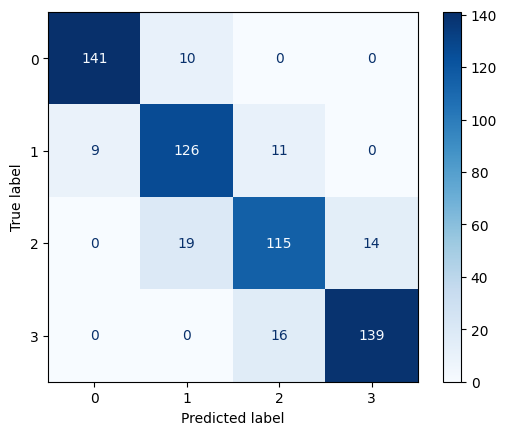

In [46]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap = 'Blues')
plt.show()

Feature importance of RCLF

In [47]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
rclf.feature_importances_

array([0.07517833, 0.00713841, 0.02843553, 0.00734379, 0.02536616,
       0.00634557, 0.03759542, 0.02565312, 0.04071872, 0.02145505,
       0.03051772, 0.05636615, 0.05603918, 0.47757201, 0.02738113,
       0.02819774, 0.02929336, 0.00597099, 0.00701994, 0.00641167])

In [49]:
top = pd.Series(rclf.feature_importances_,index = x.columns)

In [50]:
top

battery_power    0.075178
blue             0.007138
clock_speed      0.028436
dual_sim         0.007344
fc               0.025366
four_g           0.006346
int_memory       0.037595
m_dep            0.025653
mobile_wt        0.040719
n_cores          0.021455
pc               0.030518
px_height        0.056366
px_width         0.056039
ram              0.477572
sc_h             0.027381
sc_w             0.028198
talk_time        0.029293
three_g          0.005971
touch_screen     0.007020
wifi             0.006412
dtype: float64

<Axes: >

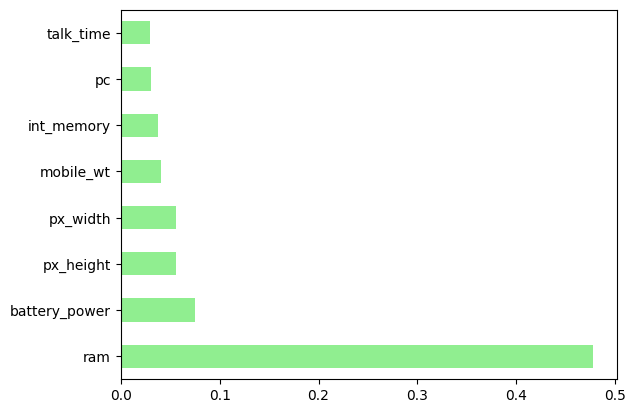

In [51]:
top.nlargest(8).plot(kind = 'barh',color = 'lightgreen')

Xgboost classifier

In [52]:
xgbclf = XGBClassifier(random_state = 42)

In [53]:
xgbclf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [54]:
y_pred_xgbclf = xgbclf.predict(x_test)

Evaluation matrix of xgbclassifier

In [55]:
accuracy = accuracy_score(y_test,y_pred_xgbclf)
precision = precision_score(y_test,y_pred_xgbclf,average = 'weighted')
recall = recall_score(y_test,y_pred_xgbclf,average = 'weighted')
f1 = f1_score(y_test,y_pred_xgbclf,average = 'weighted')

In [56]:
print(f'Accuracy Score:{accuracy:.2f}')
print(f'Precision Score:{precision:.2f}')
print(f'Recall Score:{recall:.2f}')
print(f'F1 Score:{f1:.2f}')

Accuracy Score:0.90
Precision Score:0.90
Recall Score:0.90
F1 Score:0.90


In [57]:
print(classification_report(y_test,y_pred_xgbclf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.86      0.90      0.88       146
           2       0.87      0.82      0.84       148
           3       0.92      0.93      0.92       155

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



Confusion matrix of Xgbclassifier

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [59]:
cm1 = confusion_matrix(y_test,y_pred_xgbclf)

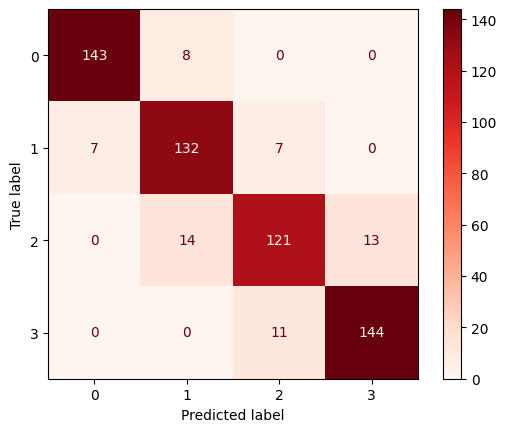

In [60]:
display1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
display1.plot(cmap = 'Reds')
plt.show()

Feature importance of XgbCLF

In [61]:
xgbclf.feature_importances_

array([0.13052367, 0.00823316, 0.02184155, 0.01562332, 0.0303612 ,
       0.02213223, 0.02310685, 0.01968338, 0.02601829, 0.01796413,
       0.0188521 , 0.0920677 , 0.07425533, 0.40259865, 0.0122748 ,
       0.02695378, 0.01853999, 0.01102138, 0.01663826, 0.01131022],
      dtype=float32)

In [62]:
top = pd.Series(xgbclf.feature_importances_,index = x.columns)

In [63]:
top

battery_power    0.130524
blue             0.008233
clock_speed      0.021842
dual_sim         0.015623
fc               0.030361
four_g           0.022132
int_memory       0.023107
m_dep            0.019683
mobile_wt        0.026018
n_cores          0.017964
pc               0.018852
px_height        0.092068
px_width         0.074255
ram              0.402599
sc_h             0.012275
sc_w             0.026954
talk_time        0.018540
three_g          0.011021
touch_screen     0.016638
wifi             0.011310
dtype: float32

<Axes: >

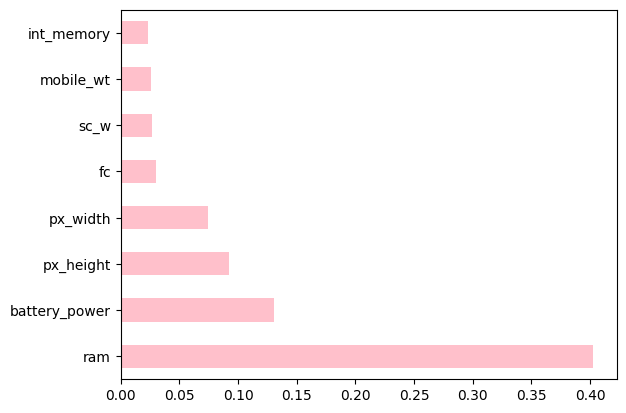

In [64]:
top.nlargest(8).plot(kind = 'barh',color = 'pink')

Lgbm Classifier

In [65]:
Lgbmclf = LGBMClassifier(random_state = 42)

In [66]:
Lgbmclf.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1360
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 20
[LightGBM] [Info] Start training from score -1.389156
[LightGBM] [Info] Start training from score -1.374931
[LightGBM] [Info] Start training from score -1.380596
[LightGBM] [Info] Start training from score -1.400683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [67]:
y_pred_lgbmclf = Lgbmclf.predict(x_test)

Evaluation matrix of Lgbmclassifier

In [68]:
accuracy = accuracy_score(y_test,y_pred_lgbmclf)
precision = precision_score(y_test,y_pred_lgbmclf,average = 'weighted')
recall = recall_score(y_test,y_pred_lgbmclf,average = 'weighted')
f1 = f1_score(y_test,y_pred_lgbmclf,average = 'weighted')

In [69]:
print(f'Accuracy Score:{accuracy:.2f}')
print(f'Precision Score:{precision:.2f}')
print(f'Recall Score:{recall:.2f}')
print(f'F1 Score:{f1:.2f}')

Accuracy Score:0.90
Precision Score:0.90
Recall Score:0.90
F1 Score:0.90


Confusion matrix of Lgbmclassifier

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [71]:
cm2 = confusion_matrix(y_test,y_pred_lgbmclf)

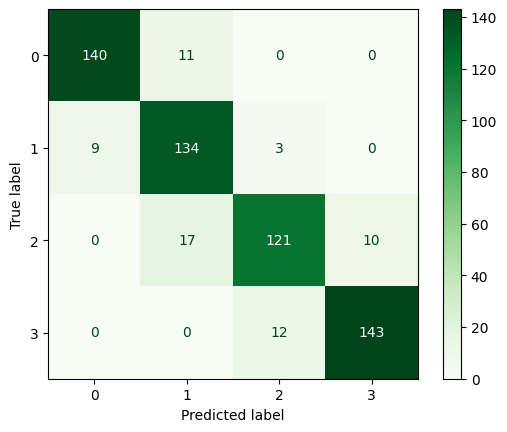

In [72]:
display2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
display2.plot(cmap = 'Greens')
plt.show()

Feature importance of LgbmCLF

In [73]:
 Lgbmclf.feature_importances_

array([2072,   71,  344,   61,  262,   57,  504,  282,  644,  207,  254,
       1559, 1508, 3038,  310,  268,  374,   30,   64,   65], dtype=int32)

In [74]:
top = pd.Series(Lgbmclf.feature_importances_,index = x.columns)

In [75]:
top

battery_power    2072
blue               71
clock_speed       344
dual_sim           61
fc                262
four_g             57
int_memory        504
m_dep             282
mobile_wt         644
n_cores           207
pc                254
px_height        1559
px_width         1508
ram              3038
sc_h              310
sc_w              268
talk_time         374
three_g            30
touch_screen       64
wifi               65
dtype: int32

<Axes: >

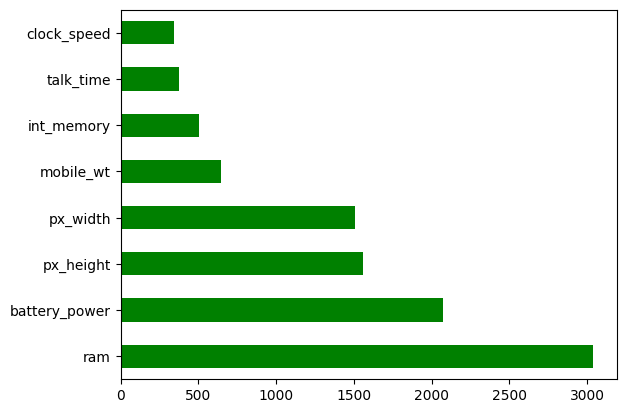

In [76]:
top.nlargest(8).plot(kind = 'barh',color = 'g')

Model Comparison

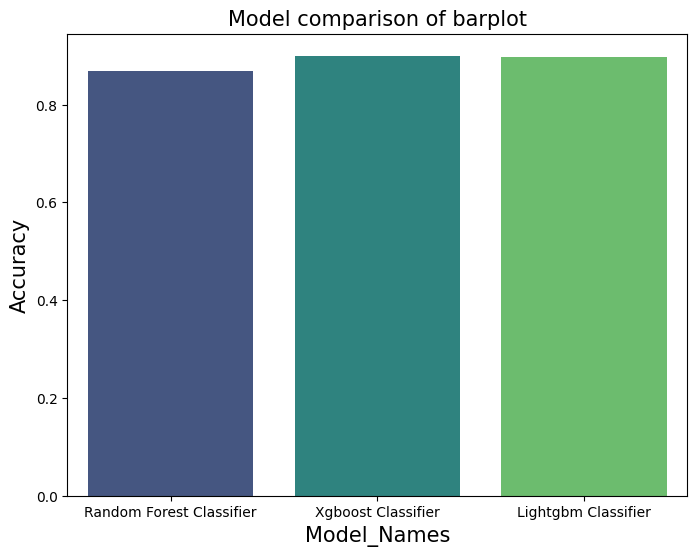

In [77]:
model_names = ['Random Forest Classifier','Xgboost Classifier','Lightgbm Classifier']
accuracy = [accuracy_score(y_test,y_pred_rclf),accuracy_score(y_test,y_pred_xgbclf),accuracy_score(y_test,y_pred_lgbmclf)]
plt.figure(figsize = (8,6)) 
sns.barplot(x = model_names,y = accuracy,palette = 'viridis')
plt.xlabel('Model_Names',fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.title('Model comparison of barplot',fontsize = 15)
plt.show()
                                                                                                      
                                                                                            

Save the model

In [78]:
import joblib
joblib.dump(rclf,'Random Forest Classifier.pk1')
loaded_rclf = joblib.load('Random Forest Classifier.pk1') 
loaded_rclf.predict([[842,0,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1,1]])

array([0])

In [79]:
import joblib
joblib.dump(xgbclf,'Xgboost Classifier.pk1')
loaded_xgbclf = joblib.load('Xgboost Classifier.pk1') 
loaded_xgbclf.predict([[842,0,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1,1]])

array([0])

In [80]:
import joblib
joblib.dump(Lgbmclf,'Lgbm Classifier.pk1')
loaded_lgbmclf = joblib.load('Lgbm Classifier.pk1') 
loaded_lgbmclf.predict([[842,0,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1,1]])

array([0])